# Top Rated Books

Inspired by IMDB Top 250 Movie chart, we present a simple recommendation system where books in the dataset are ranked according to a certain rating metric.

This model could inspire users to select a next book to read from a list of the best books, especially new users.

In [14]:
import pandas as pd
import seaborn as  sns

In [2]:
df = pd.read_csv('./dataset/final_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,userID,Age,city,state,country,AgeCategory,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
0,0,8,35,timmins,ontario,canada,18-35,0002005018,5.0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
1,14,8,35,timmins,ontario,canada,18-35,1881320189,7.0,Goodbye to the Buttermilk Sky,Julia Oliver,1994.0,River City Pub
2,11,8,35,timmins,ontario,canada,18-35,1552041778,5.0,Jane Doe,R. J. Kaiser,1999.0,Mira Books
3,13,8,35,timmins,ontario,canada,18-35,1575663937,6.0,More Cunning Than Man: A Social History of Rat...,Robert Hendrickson,1999.0,Kensington Publishing Corp.
4,10,8,35,timmins,ontario,canada,18-35,0887841740,5.0,The Middle Stories,Sheila Heti,2004.0,House of Anansi Press


In [6]:
ndf = df.groupby('bookTitle').agg(
    {
        'userID':'size',
        'bookRating': 'mean'
    }
).reset_index()

In [7]:
ndf.head()

,bookTitle,userID,bookRating
0,A Light in the Storm: The Civil War Diary of ...,1,9.0
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.0
2,"Boule De Suif (Penguin Classics)""",1,7.0
3,"Civil Disobedience"" and ""Reading"" (Penguin Cl...",1,9.0
4,Dark Justice,1,10.0


In [19]:
ndf['ratingCount'].describe() #.describle()

count    135573.000000
mean          2.823792
std           9.087405
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         707.000000
Name: ratingCount, dtype: float64

In [9]:
ndf.rename({'userID':'ratingCount', 'bookRating':'ratingAverage'}, axis=1, inplace=True)

<AxesSubplot:ylabel='ratingCount'>

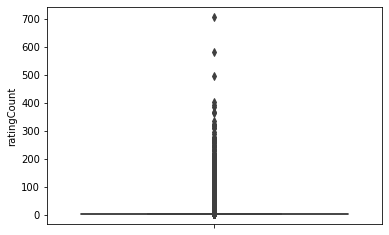

In [20]:
sns.boxplot(y=ndf['ratingCount'])

In [21]:
#the min  number of review by book
m = 40

In [23]:
# Calculate average review for all books
C = df['bookRating'].mean()
C

7.624345009534258

In [22]:
#Only consider the books with more than m review
books = ndf[ndf.ratingCount >= m]

In [25]:
# Function to compute the IMDB weighted rating for each movie
#https://github.com/PacktPublishing/Hands-On-Recommendation-Systems-with-Python/blob/master/Chapter3/Simple%20Recommender.ipynb
def weighted_rating(row, m=m, C=C):
    v = row['ratingCount']
    R = row['ratingAverage']
    # Compute the weighted score
    return (v/(v+m) * R) + (m/(m+v) * C)

In [26]:
ndf['score'] = ndf.apply(weighted_rating, axis=1)

In [27]:

#Sort books in descending order of their scores
ndf.sort_values('score', ascending=False, inplace=True)

In [31]:
ndf.reset_index(drop=True, inplace=True)

In [32]:
ndf

,bookTitle,ratingCount,ratingAverage,score
0,"The Two Towers (The Lord of the Rings, Part 2)",135,9.333333,8.942707
1,Harry Potter and the Goblet of Fire (Book 4),242,9.107438,8.897070
2,Harry Potter and the Prisoner of Azkaban (Book 3),274,9.040146,8.859789
3,"The Return of the King (The Lord of the Rings,...",101,9.297030,8.822509
4,Harry Potter and the Order of the Phoenix (Boo...,211,9.047393,8.820613
...,...,...,...,...
135568,The Sexual Life of Catherine M.,22,4.818182,6.628610
135569,4 Blondes,52,5.653846,6.510585
135570,Four Blondes,65,5.353846,6.218798
135571,Isle of Dogs,106,5.433962,6.034067


we can notice that some of best selling books like Harry Potter, the lord of the rings, the little  Prince in the top of the recommded list
